In [16]:
! pip install cartopy matplotlib owslib

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from owslib.wmts import WebMapTileService

In [17]:
# Load Core Data
filename = 'CCN_cores.csv'
df = pd.read_csv(filename)

In [10]:
# Subset for Gulf of Nicoya Region
S = 9.306111
N = 10.366673
W = -85.616630
E = -84.244727

df_sub = df[(df['latitude'] > S) & (df['latitude'] < N) & (df['longitude'] > W) & (df['longitude'] < E)]

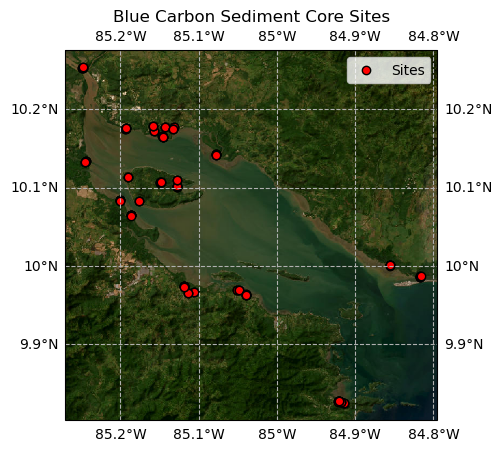

In [24]:
# Create a figure and set projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Fetch ESRI World Imagery tiles via WMTS
wmts_url = "https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/WMTS"
wmts = WebMapTileService(wmts_url)
layer = "World_Imagery"

# Use WMTS for high-resolution ESRI satellite imagery
ax.add_wmts(wmts, layer)

# Add borders
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="white")
ax.gridlines(draw_labels=True, linestyle="--")

# Plot blue carbon sites
ax.scatter(df_sub['longitude'].values, df_sub['latitude'].values, color='red', marker='o', edgecolor='k', transform=ccrs.PlateCarree(), 
           label="Sites")
plt.title("Blue Carbon Sediment Core Sites")
plt.legend()
plt.savefig('../figures/nicoya_bc.png', dpi=300)

# Show the plot
plt.show()

In [28]:
min(df_sub['latitude'])


9.824509

In [29]:
min(df_sub['longitude'])

-85.24883639